In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

r2 tng: 0.1268344320313104
r2 val: 0.13115076297029324
r2 test: 0.1514183842134351


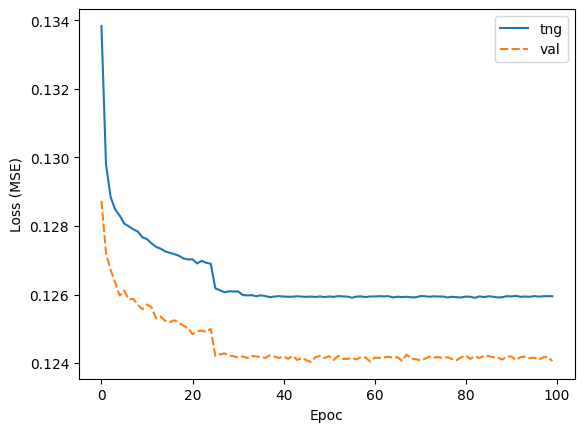

In [2]:
import numpy as np 
from seaborn import lineplot

training_losses = np.load("../outputs/prototype_train_and_test_within-sites_original-tr/training_losses.npy", allow_pickle=True).tolist()
training_losses = pd.DataFrame(training_losses)
g = lineplot(data=training_losses)
g.set_xlabel("Epoc")
g.set_ylabel("Loss (MSE)")


for fold in ["tng", "val", "test"]:
    r2 = np.load(f"../outputs/prototype_train_and_test_within-sites_original-tr/r2_{fold}.npy", allow_pickle=True)
    print(f"r2 {fold}: {np.mean(r2)}")


[Text(0, 0, 'abide1_site-NYU'),
 Text(1, 0, 'abide1_site-USM'),
 Text(2, 0, 'abide1_site-KKI'),
 Text(3, 0, 'abide1_site-SDSU'),
 Text(4, 0, 'abide1_site-MaxMun_c'),
 Text(5, 0, 'abide1_site-UCLA_1'),
 Text(6, 0, 'abide1_site-OHSU'),
 Text(7, 0, 'abide1_site-MaxMun_d'),
 Text(8, 0, 'abide1_site-MaxMun_a'),
 Text(9, 0, 'abide1_site-Trinity'),
 Text(10, 0, 'abide1_site-Olin'),
 Text(11, 0, 'abide1_site-Pitt'),
 Text(12, 0, 'abide1_site-MaxMun_b'),
 Text(13, 0, 'abide2_site-OHSU_1'),
 Text(14, 0, 'abide2_site-USM_1'),
 Text(15, 0, 'abide2_site-NYU_1'),
 Text(16, 0, 'abide2_site-BNI_1'),
 Text(17, 0, 'abide2_site-UCD_1'),
 Text(18, 0, 'abide2_site-GU_1'),
 Text(19, 0, 'abide2_site-IP_1'),
 Text(20, 0, 'abide2_site-UCLA_1'),
 Text(21, 0, 'abide2_site-TCD_1'),
 Text(22, 0, 'abide2_site-SDSU_1'),
 Text(23, 0, 'abide2_site-ETHZ_1'),
 Text(24, 0, 'abide2_site-IU_1')]

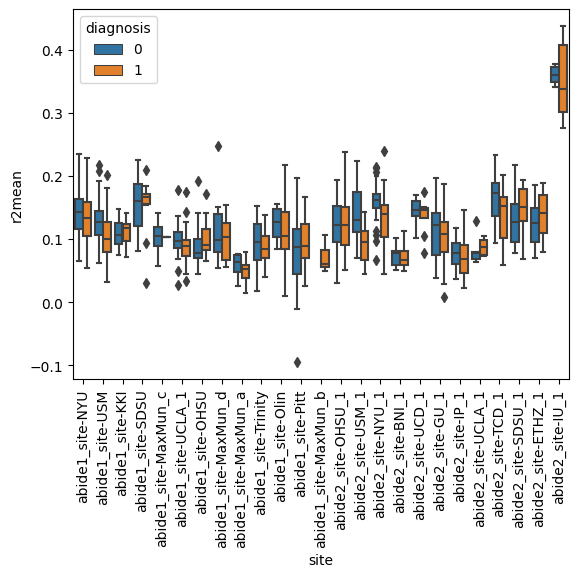

In [4]:
from seaborn import boxplot

g = boxplot(x="site", y="r2mean", hue="diagnosis", data=r2mean)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'abide1_site-NYU'),
 Text(1, 0, 'abide1_site-USM'),
 Text(2, 0, 'abide1_site-KKI'),
 Text(3, 0, 'abide1_site-SDSU'),
 Text(4, 0, 'abide1_site-MaxMun_c'),
 Text(5, 0, 'abide1_site-UCLA_1'),
 Text(6, 0, 'abide1_site-OHSU'),
 Text(7, 0, 'abide1_site-MaxMun_d'),
 Text(8, 0, 'abide1_site-MaxMun_a'),
 Text(9, 0, 'abide1_site-Trinity'),
 Text(10, 0, 'abide1_site-Olin'),
 Text(11, 0, 'abide1_site-Pitt'),
 Text(12, 0, 'abide1_site-MaxMun_b'),
 Text(13, 0, 'abide2_site-OHSU_1'),
 Text(14, 0, 'abide2_site-USM_1'),
 Text(15, 0, 'abide2_site-NYU_1'),
 Text(16, 0, 'abide2_site-BNI_1'),
 Text(17, 0, 'abide2_site-UCD_1'),
 Text(18, 0, 'abide2_site-GU_1'),
 Text(19, 0, 'abide2_site-IP_1'),
 Text(20, 0, 'abide2_site-UCLA_1'),
 Text(21, 0, 'abide2_site-TCD_1'),
 Text(22, 0, 'abide2_site-SDSU_1'),
 Text(23, 0, 'abide2_site-ETHZ_1'),
 Text(24, 0, 'abide2_site-IU_1')]

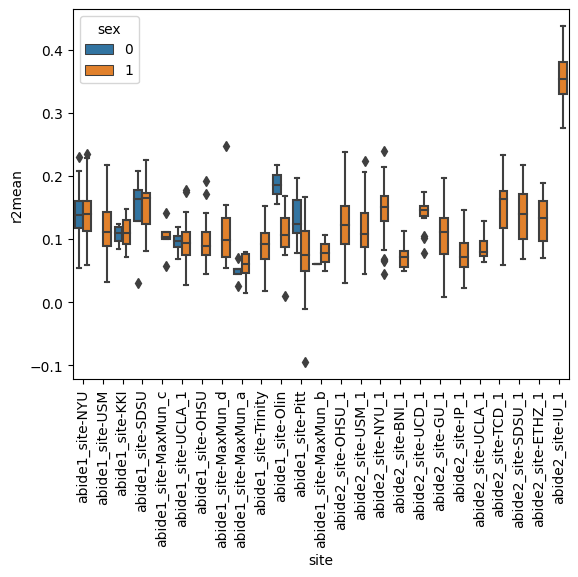

In [6]:
g = boxplot(x="site", y="r2mean", hue="sex", data=r2mean)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [3]:
r2mean = pd.read_csv("../outputs/prototype_predict_horizon_within-sites_original-tr/prototype_train_and_test_within-sites_original-tr_horizon-1.tsv", index_col=0, sep='\t')
weird_result = r2mean.index[r2mean.r2mean > -1e+16]
r2mean = r2mean[(r2mean.r2mean > -1e+16)]   # remove outliers

# stats on average r2 to quickly check the results
r2mean = sm.add_constant(r2mean)
formula = 'r2mean ~ const + C(site) + C(diagnosis)'
results = ols(formula, r2mean).fit()
print(results.summary(title="A very lazy linear model for a glance"))

                    A very lazy linear model for a glance                     
Dep. Variable:                 r2mean   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     30.73
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          2.00e-101
Time:                        18:02:37   Log-Likelihood:                 1639.4
No. Observations:                 885   AIC:                            -3227.
Df Residuals:                     859   BIC:                            -3102.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [5]:
# stats on average r2 to quickly check the results
r2mean = sm.add_constant(r2mean)
formula = 'r2mean ~ const + C(sex)'
results = ols(formula, r2mean).fit()
print(results.summary(title="A very lazy linear model for a glance"))

                    A very lazy linear model for a glance                     
Dep. Variable:                 r2mean   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08657
Date:                Tue, 01 Aug 2023   Prob (F-statistic):              0.769
Time:                        18:04:02   Log-Likelihood:                 1356.7
No. Observations:                 885   AIC:                            -2709.
Df Residuals:                     883   BIC:                            -2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0620      0.003     18.815      